In [2]:
import pandas as pd
import openpyxl
import numpy as np
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.spatial.distance as dis
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance as dist

In [3]:
basepath ="/Users/kazuki/Documents/Study/data/ryukyu/{}"
basepath2="/Users/kazuki/Downloads/{}"
rftri    = basepath2.format("gramTri/pattern/{}/{}.xlsx")
rfcos    = basepath2.format("gramTri/cosSim/{}/distanceMatrix.xlsx")
rflocate = basepath.format("parameter/locations.xlsx")
rfword   = basepath.format("parameter/sheetlist.xlsx")

In [4]:
locateDf = pd.read_excel(rflocate, sheet_name=0, header=0, index_col=0)
wordDf  = pd.read_excel(rfword , sheet_name=0, header=0, index_col=0)

In [5]:
symbols=list(locateDf.iloc[:,0])
locates = list(locateDf.iloc[:,2])
hyouzi = list(locateDf.iloc[:,1])
words   = list(wordDf.iloc[:,0])

In [5]:
cosDf    = pd.read_excel(rfcos.format("cvc/"), sheet_name=10, header=0, index_col=0)
triDf=pd.read_excel(rftri.format("cvc/",locates[10]), sheet_name=0, header=0, index_col=0)

In [6]:
similar=[0 for locate in locates]
for si,locate in enumerate(locates):
    tmd=cosDf.sort_values(locate, ascending=False)
    tmdind=list(tmd.index)
    tmddata=list(tmd.iloc[:,si])
    similar[si]=[tmddata,tmdind]

In [58]:
print(similar[0][0])

[1.0, 0.341663190507582, 0.3285735198712123, 0.3190476190476191, 0.3121260649359023, 0.3089571903266624, 0.3087903397499709, 0.3043797937175354, 0.27828933949617, 0.2677040943154275, 0.2593355007722319, 0.2513316284851148, 0.2470440070321242, 0.2454951265154914, 0.2444735487068407, 0.2441770440749869, 0.2374269628950994, 0.2341519513777018, 0.2320477404461286, 0.2310088296257945, 0.2290948974763284, 0.2287328250598977, 0.2249497935952692, 0.2224282697604351, 0.2205665638698901, 0.2170188817646993, 0.2163561557487433, 0.2157297230327303, 0.2142378986621611, 0.2133956074355435, 0.21295885499998, 0.2107954136073567, 0.2101517619869082, 0.2099562636671296, 0.2099479556417354, 0.2088819511956071, 0.2084713828330341, 0.2080119786670548, 0.2076348836249805, 0.2070196678027063, 0.2035260037290531, 0.2035260037290531, 0.203399012761702, 0.2018515484682929, 0.1998858121516967, 0.1996159240122, 0.1987696644595938, 0.198530638477829, 0.1982920267967335, 0.198170056262499, 0.198170056262499, 0.1972

In [59]:
wf=basepath2.format("testsim.xlsx")
with pd.ExcelWriter(wf, engine='openpyxl') as writer:
    for si,locate in enumerate(locates):
        wdf=pd.DataFrame(similar[si],index=range(2), columns=range(len(locates)))
        wdf=wdf.T
        wdf.to_excel(writer,sheet_name=locate) #シート名[地点名]

# 地点ごとの発音

In [ ]:
rftri=basepath.format("gramTri/counter/all.xlsx")
triDf=pd.read_excel(rftri, sheet_name=0, header=0, index_col=0)

In [ ]:
#図の生成
figtitle='Dendrogram for pronunciation features in each region'
himethod='ward'
savefile=basepath.format("gramTri/pic/dendAE.png")
newdata=triDf.values
newdata=newdata.T
pdis=dist.pdist(newdata,'cosine')
z = hierarchy.linkage(pdis, method=himethod,metric="cosine")

plt.figure(figsize=(60,25))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('Regions', fontsize=55)
plt.ylabel('Intercluster distance', fontsize=55)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0., # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
plt.savefig(savefile)
plt.show()
plt.close()

# z = hierarchy.linkage(newdata, method=himethod,metric="cosine")
# linkage_result = linkage(iris_df, method='ward', metric='euclidean')
# # クラスタ分けするしきい値を決める
# threshold = 0.7 * np.max(linkage_result[:, 2])
# # 階層型クラスタリングの可視化
# plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
# dendrogram(linkage_result, labels=iris_labels, color_threshold=threshold)
# plt.show()
# # クラスタリング結果の値を取得
# clustered = fcluster(linkage_result, threshold, criterion='distance')

In [9]:
threshold = 0.3 * np.max(z[:, 2])
c = hierarchy.fcluster(z, threshold, criterion='distance')
print(c)
wf=basepath.format("gramTri/counter/AE.csv")
wdf=pd.DataFrame(hyouzi,index=hyouzi, columns=["市町村"])
wdf["グループ"]=c
wdf.to_csv(wf,header=False, index=False) #シート名[地点名]

[3 5 5 5 5 5 5 5 5 5 5 6 6 6 5 5 5 7 7 4 7 7 7 7 7 7 7 7 7 7 7 7 7 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 2 2]


# 地域間の音のずれ

In [12]:
rftri=basepath.format("gramTri/pattern2/all/{}.xlsx")
distanceMatrix=[0 for i in locates]
for i,locate in enumerate(locates):
    triDf=pd.read_excel(rftri.format(locate), sheet_name=0, header=0, index_col=0)
    tmp=triDf.values
    distanceMatrix[i]=tmp.flatten()
    print(i)

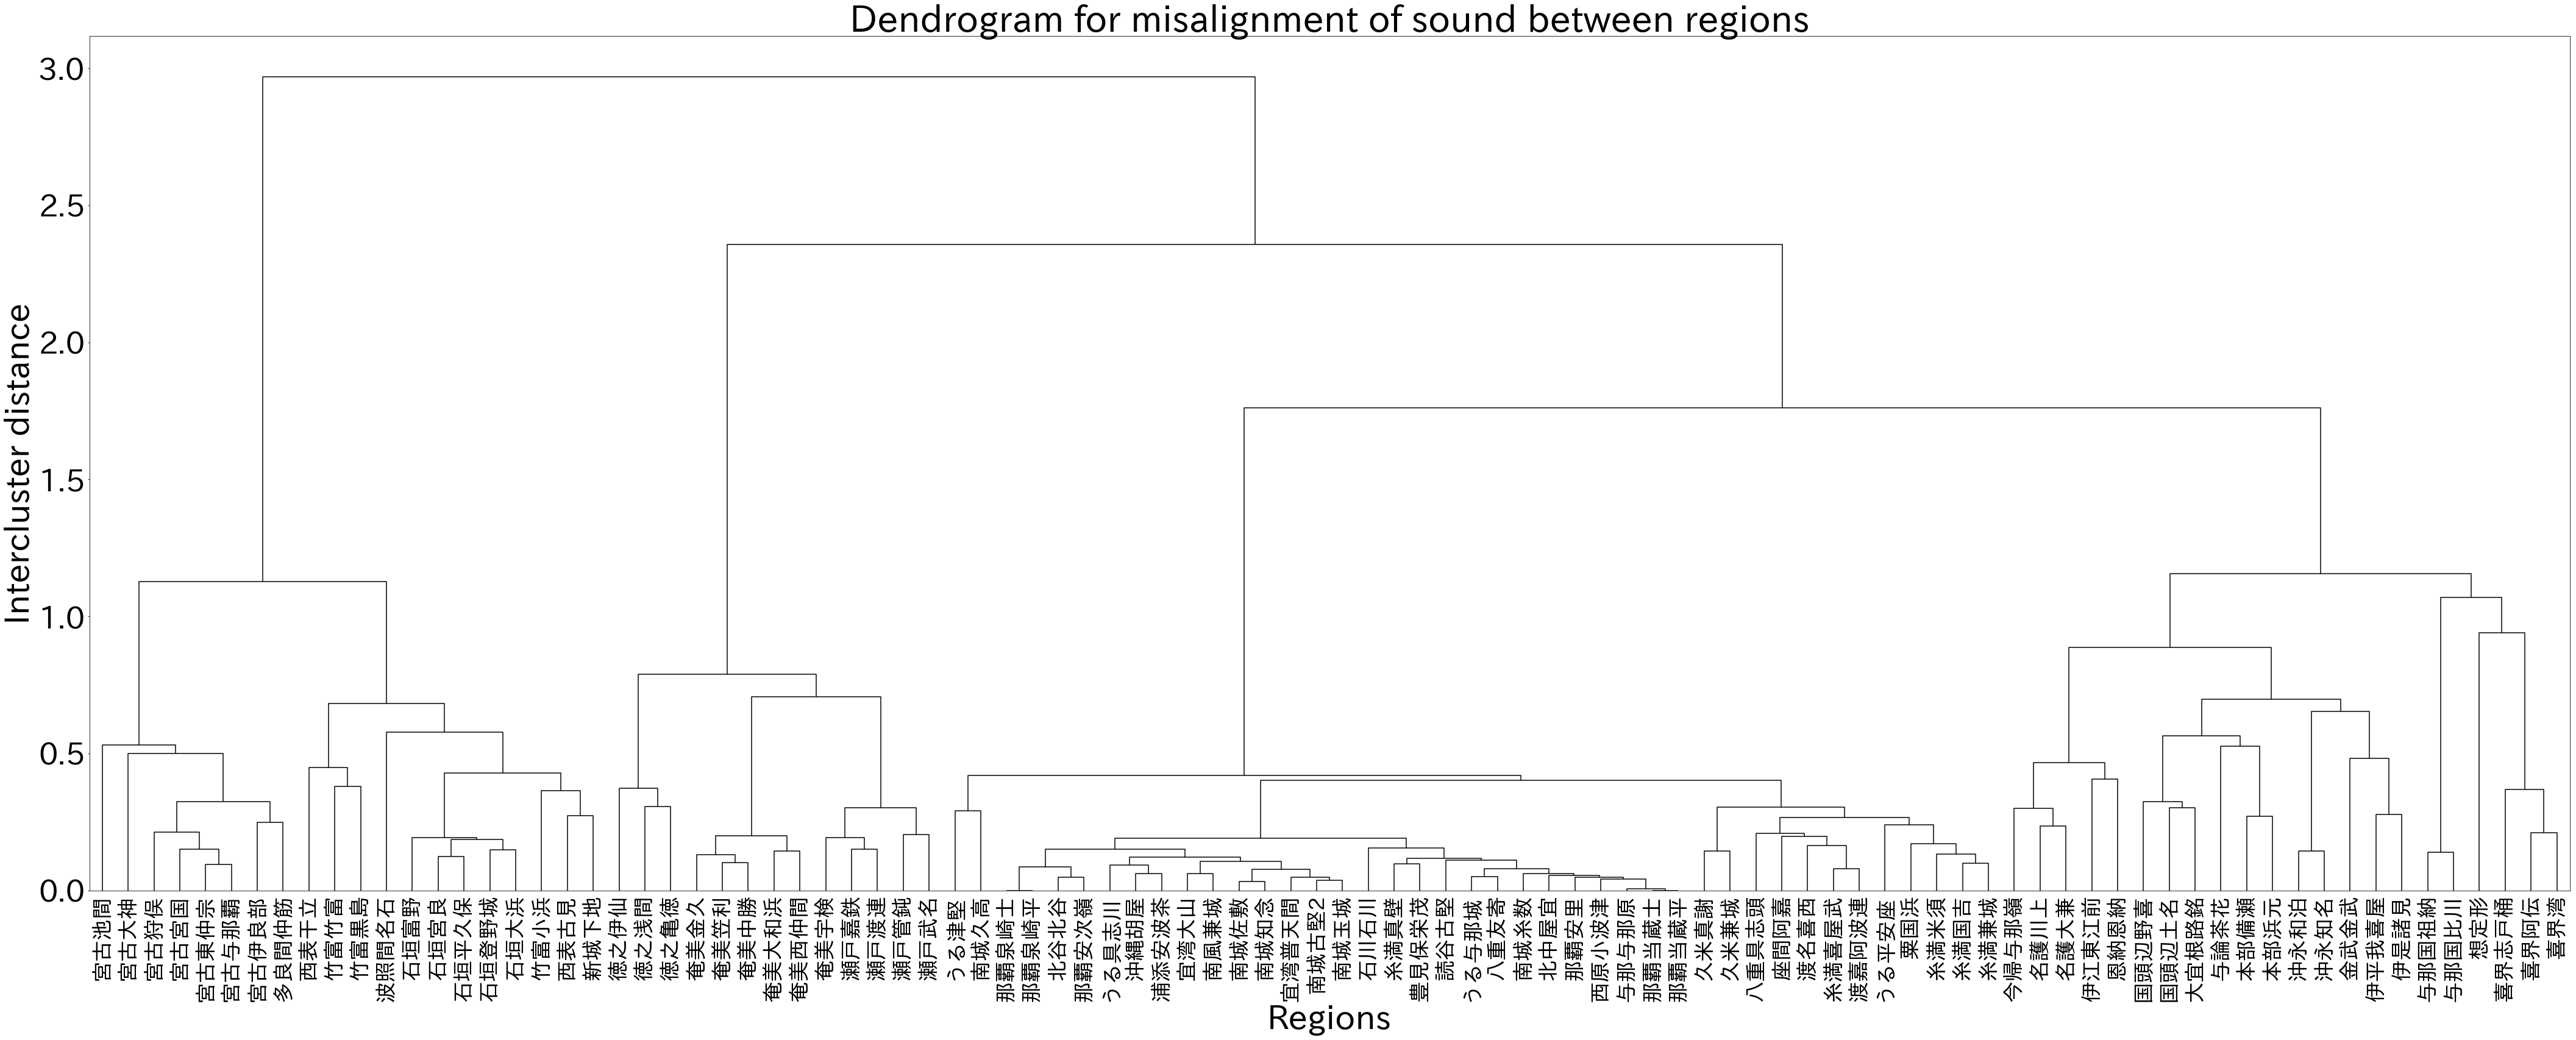

In [14]:
#図の生成
figtitle='Dendrogram for misalignment of sound between regions'
himethod='ward'
savefile=basepath.format("gramTri/pic/dendAD.png")
pdis=dist.pdist(distanceMatrix,'cosine')
z = hierarchy.linkage(pdis, method=himethod,metric="cosine")

plt.figure(figsize=(60,25))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('Regions', fontsize=55)
plt.ylabel('Intercluster distance', fontsize=55)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0., # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
plt.savefig(savefile)
plt.show()
plt.close()

In [15]:
threshold = 0.3 * np.max(z[:, 2])
c = hierarchy.fcluster(z, threshold, criterion='distance')
print(c)
wf=basepath.format("gramTri/pattern2/AD.csv")
wdf=pd.DataFrame(hyouzi,index=hyouzi, columns=["市町村"])
wdf["グループ"]=c
wdf.to_csv(wf,header=False, index=False) #シート名[地点名]

[8 3 3 3 3 3 3 3 3 3 3 7 7 7 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 6 6]


In [ ]:
# 距離のまとめ
wfdistance=basepath.format("data/gramTri/pattern2/distanceA.xlsx")
with pd.ExcelWriter(wfdistance, engine='openpyxl') as writer:
    wdf=pd.DataFrame(distanceMatrix,index=locates, columns=range(len(distanceMatrix[0])))
    wdf.to_excel(writer,sheet_name="distance")#シート名[地点名]